In [1]:
import math
from functools import partial
import jax
from jax import vmap
import jax.numpy as jnp
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm

from sklearn.manifold import TSNE

import os

In [9]:
def plot_data(save_path, seed, cluster, cat, probs, x):
    fig = plt.figure()
    fig.set_size_inches(8, 4.8)
    ax = plt.subplot(111)

    ax.scatter(x[:, 0], x[:, 1], marker='o', c=probs[:, cat],
                cmap=mcol.LinearSegmentedColormap.from_list("ProbabilityCmap", ["r", "b"]))

    plt.title("Probability of Category {} (Cluster {})".format(cat, cluster))

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 1), cmap=mcol.LinearSegmentedColormap.from_list("ProbabilityCmap", ["r", "b"])),
                  ax=ax, orientation='vertical',
                  label='Probability of Category {} (Cluster {})'.format(cat, cluster))

    ax.legend(loc='center left', bbox_to_anchor=(1.4, 0.5))
    for ha in ax.legend_.legend_handles:
        ha.set_edgecolor("black")

    plt.tight_layout()

    if not os.path.exists(save_path):
        os.mkdir(save_path)
    
    if not os.path.exists('{}/seed_{}'.format(save_path, seed)):
        os.mkdir('{}/seed_{}'.format(save_path, seed))

    plt.savefig('{}/seed_{}/seed_{}_cluster_{}.png'.format(save_path, seed, seed, cluster))

    plt.show()
    
    plt.close(fig)

In [3]:
def create_w_e(rng, e_size, cats):
    rng, new_rng = jax.random.split(rng, num=2)
    W_e = jax.random.normal(new_rng, shape=(e_size, cats))

    return W_e

In [11]:
cats = 50
c_size = 500
i_size = 5
e_size = 15
k = 5
input_range = 1
l = 5
dist = 0.1

# begin training
eval_rng = jax.random.PRNGKey(5)
eval_rng, val_rng, train_data_rng, w_e_rng = jax.random.split(eval_rng, num=4)

W_e = create_w_e(w_e_rng, e_size, cats)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


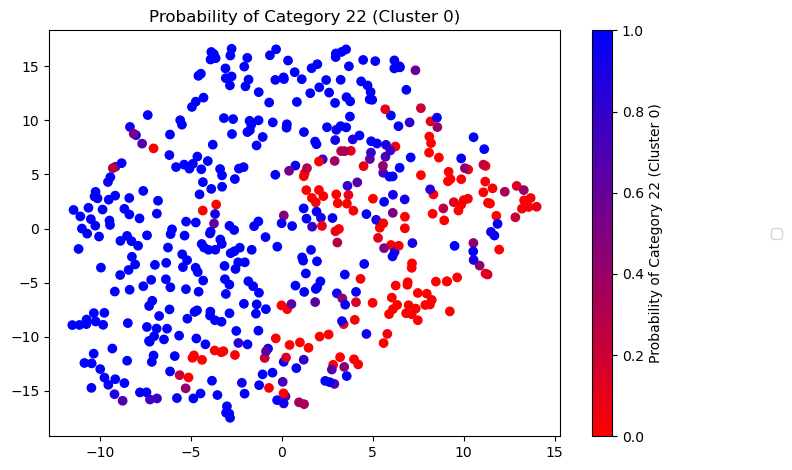

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


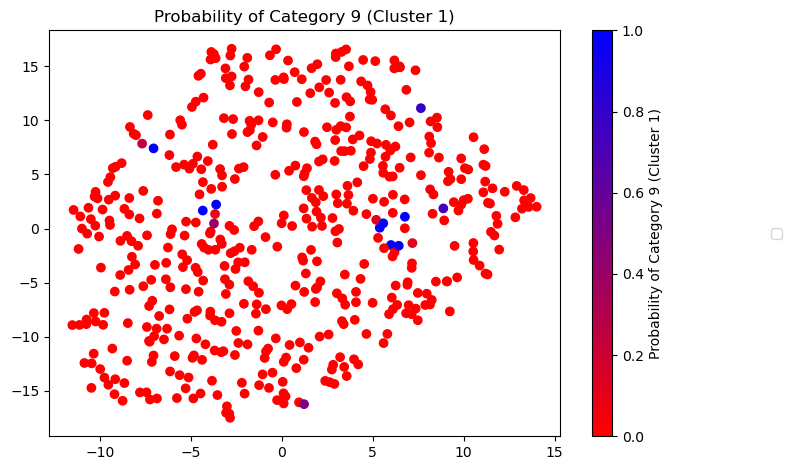

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


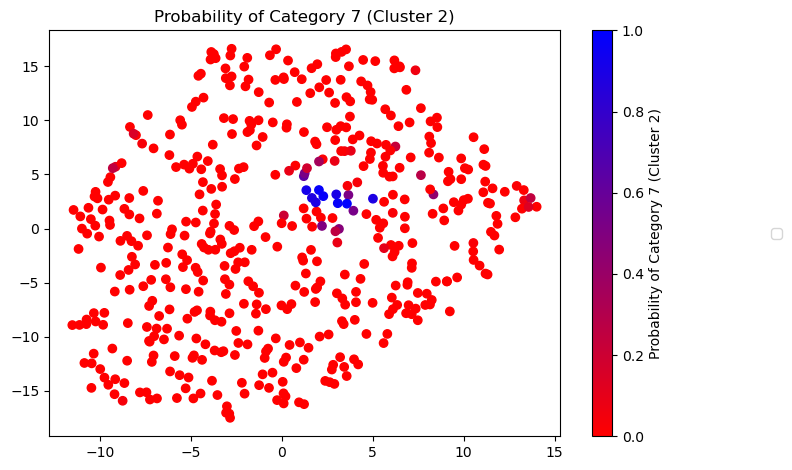

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


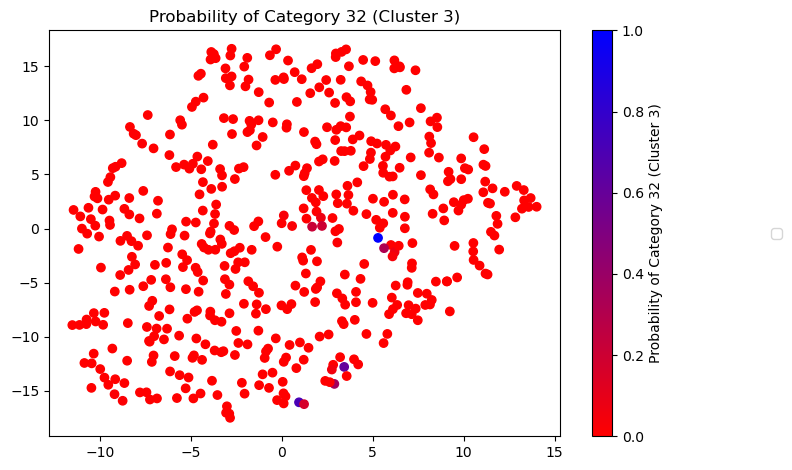

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


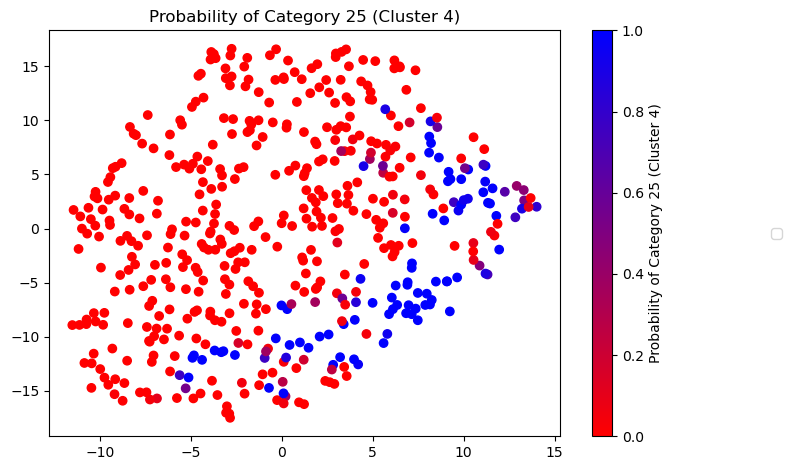

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


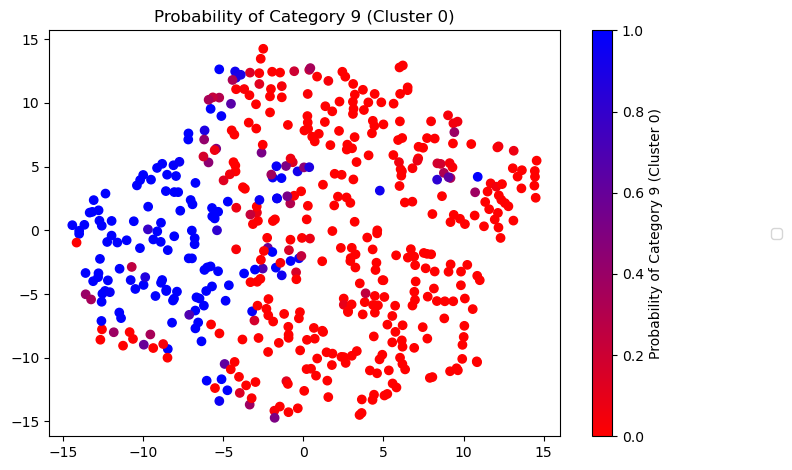

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


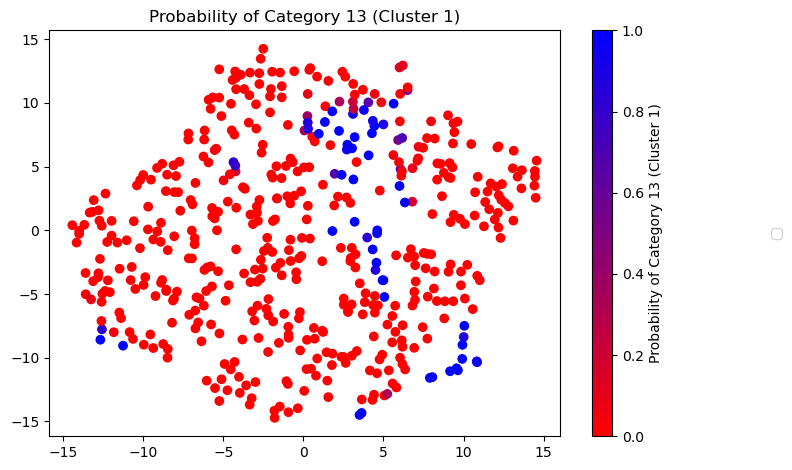

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


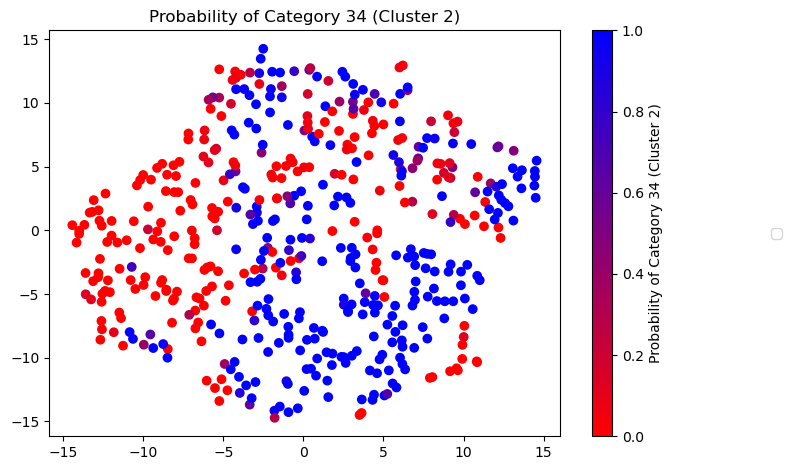

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


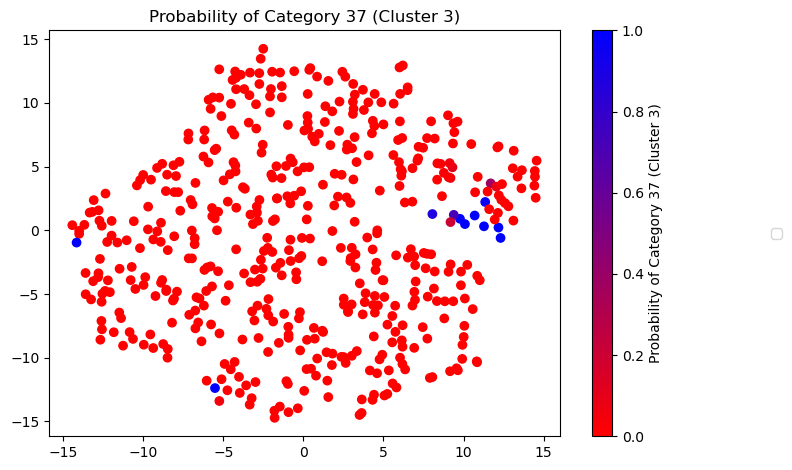

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


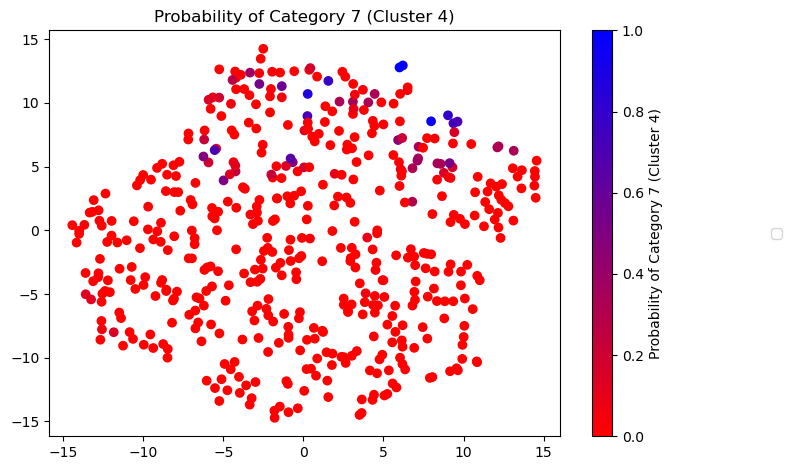

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


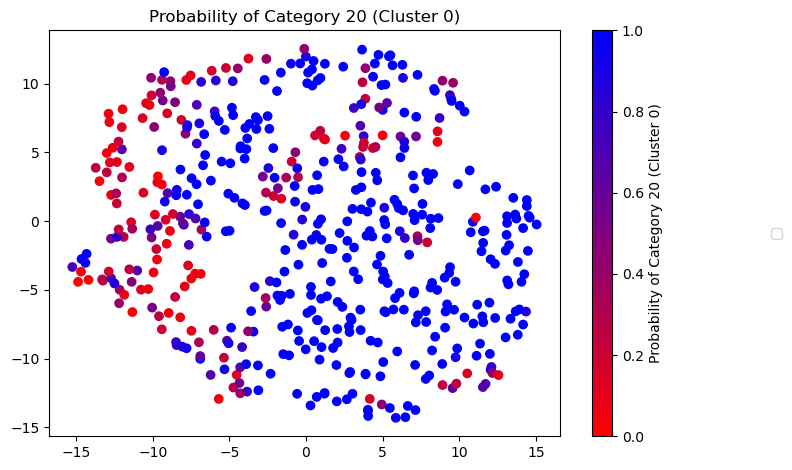

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


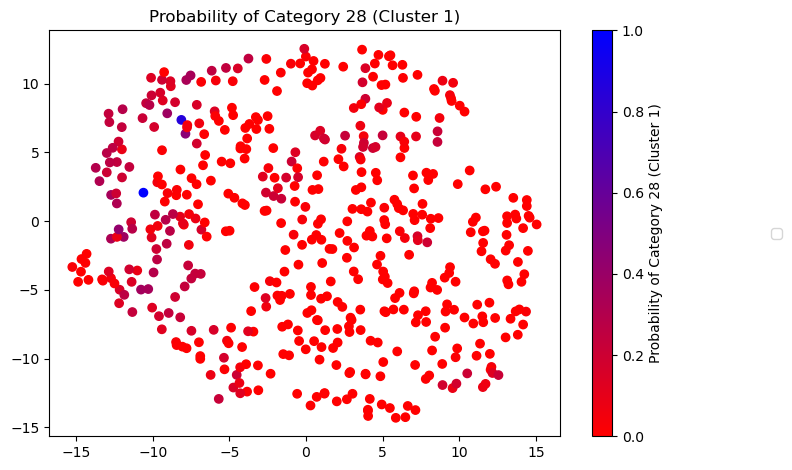

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


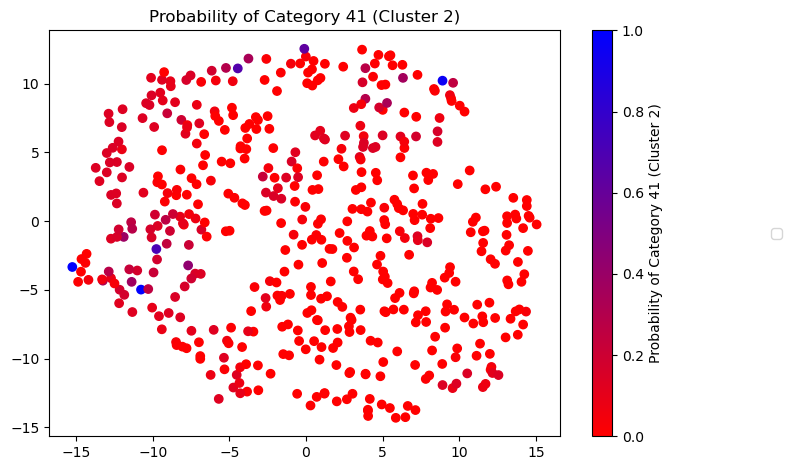

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


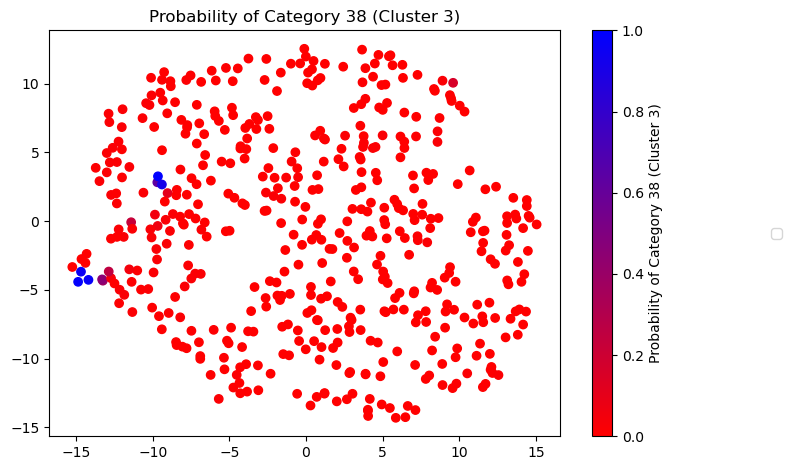

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


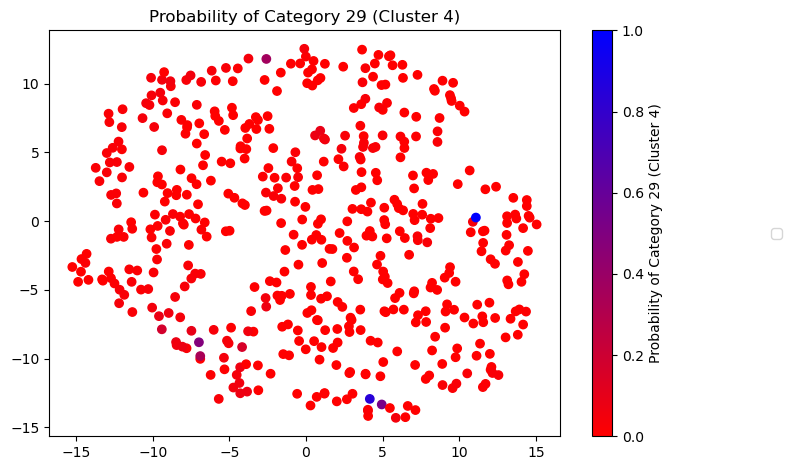

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


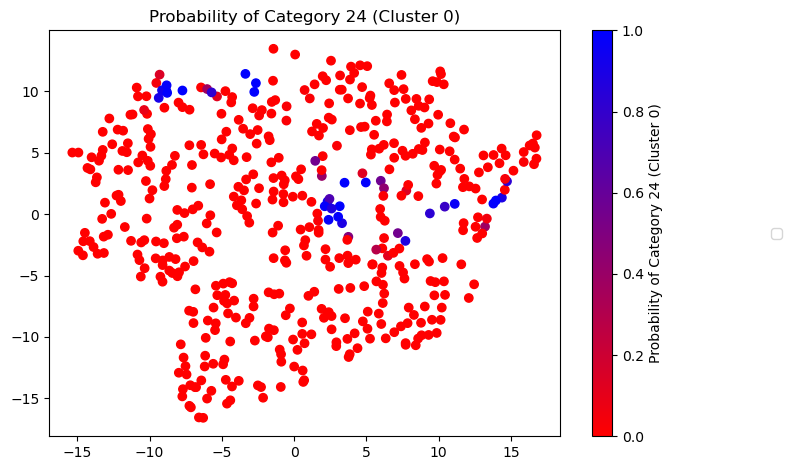

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


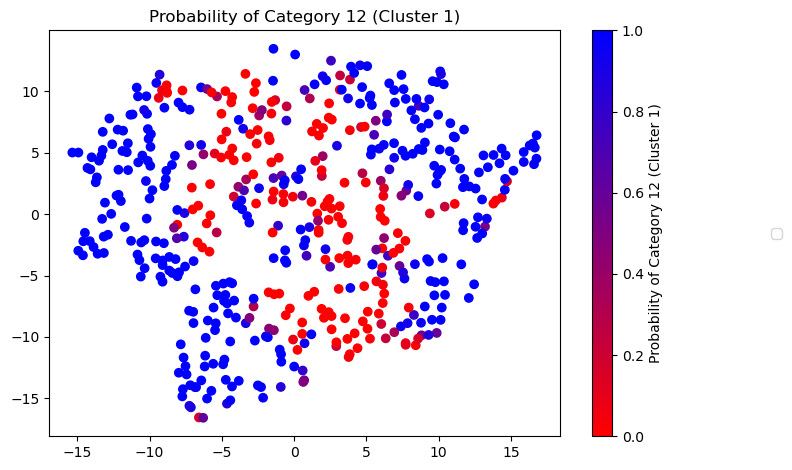

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


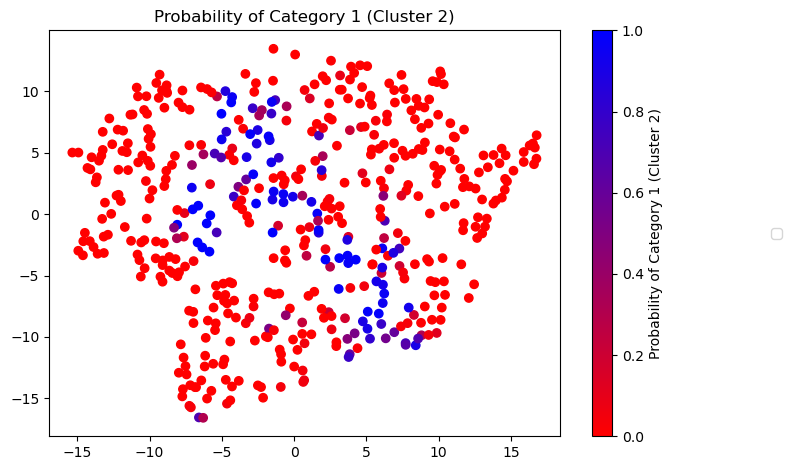

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


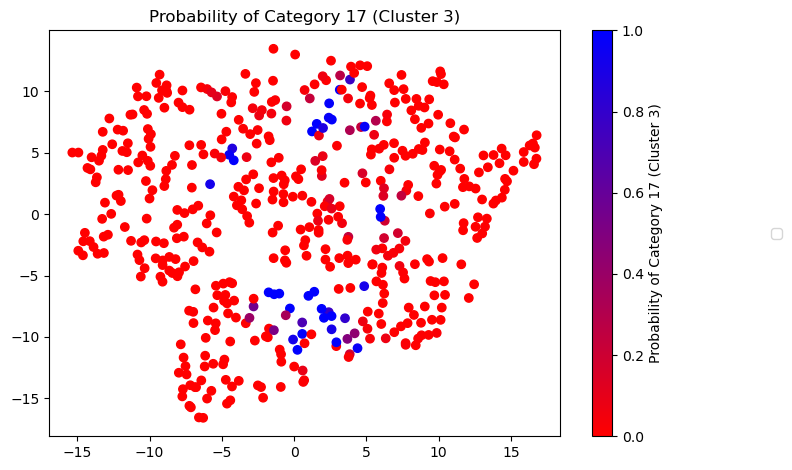

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


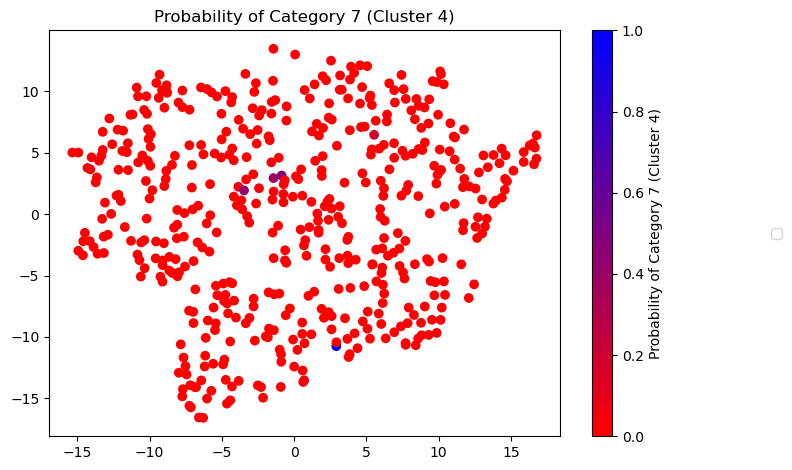

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


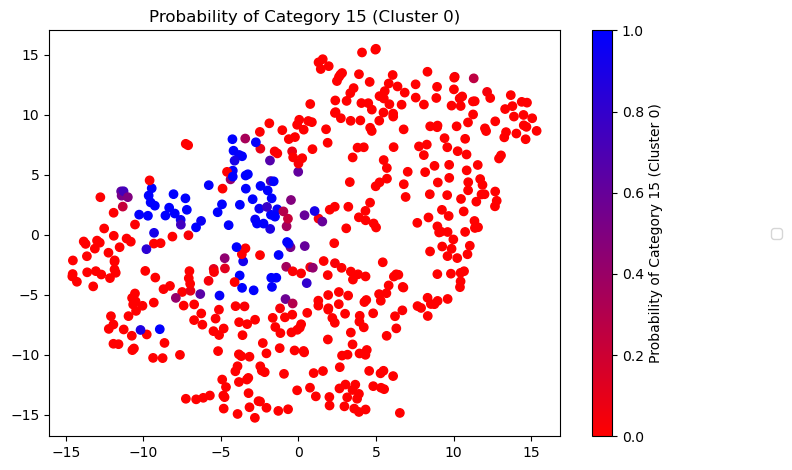

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


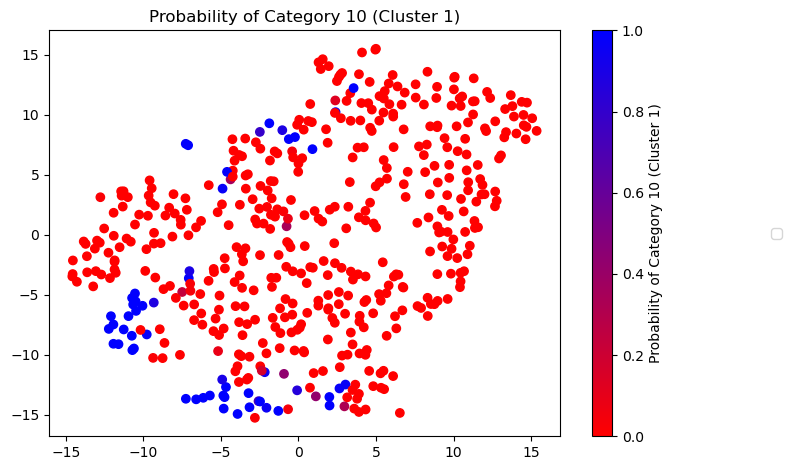

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


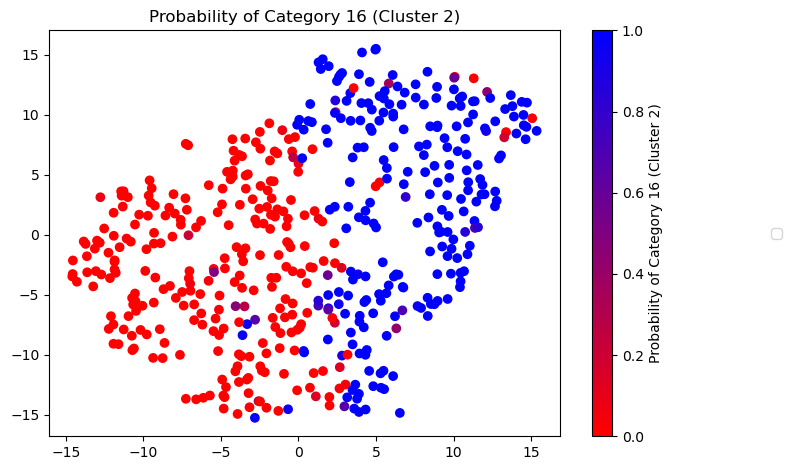

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


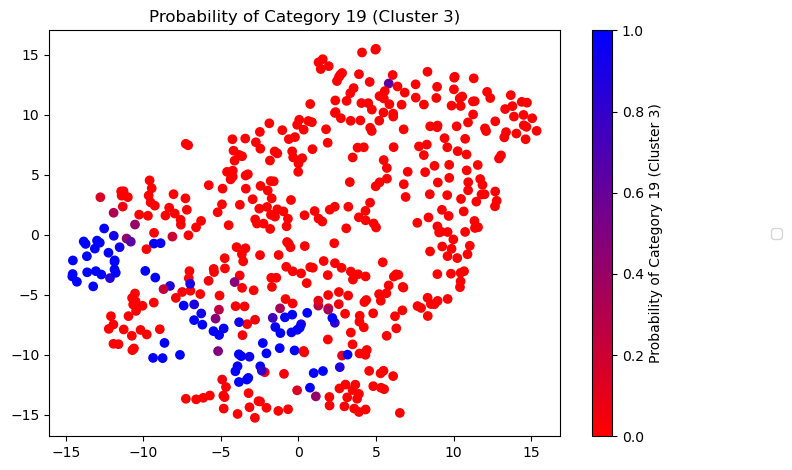

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


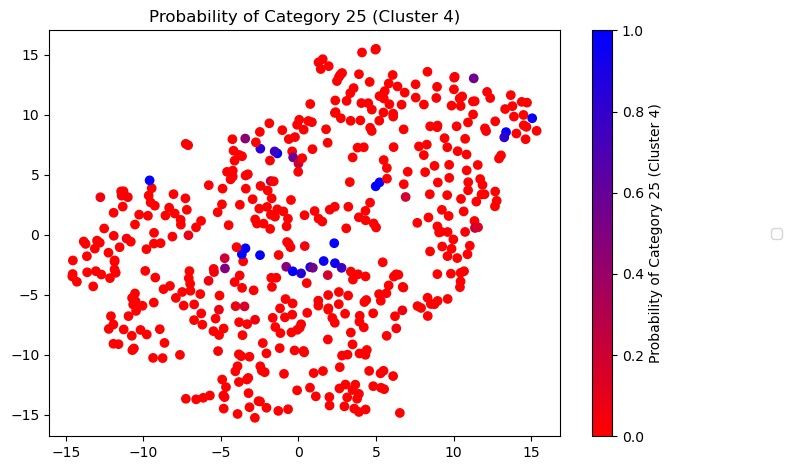

In [12]:
for seed in range(5):
    rng = jax.random.PRNGKey(seed)
    rng, new_rng, new_rng2, new_rng3, new_rng4, new_rng5, new_rng6 = jax.random.split(rng, num=7)

    # draw training data and query
    x = jax.random.uniform(new_rng, shape=[c_size, i_size],
                            minval=-input_range, maxval=input_range)
    x_query = jax.random.uniform(new_rng2, shape=[1, i_size],
                                    minval=-input_range, maxval=input_range)

    c_idx = jax.random.choice(new_rng3, a=cats, shape=(k,), replace=False)
    w_c = W_e[:, c_idx]

    x_mean = jax.random.normal(new_rng4, shape=(k, i_size))

    l2_means = jnp.sum((x_mean[:, None, :] - x_mean[None, :, :])**2, axis=-1)

    modified_l2 = jnp.where(l2_means == 0, jnp.inf, l2_means)
        
    # Find the indices of the minimum values along the rows
    min_indices = jnp.argmin(modified_l2, axis=1)

    closest = l2_means[jnp.arange(l2_means.shape[0]), min_indices]

    sigma = jnp.sqrt(-1 * closest / jnp.log(dist))

    diff = x[:, None, :] - x_mean[None, :, :]

    l2 = jnp.sum(diff ** 2, axis=-1)

    rbf = jnp.exp(-1 * l2 / (sigma ** 2))
    
    f = l * (rbf @ w_c.T)

    logits = f @ W_e

    probs = jax.nn.softmax(logits, axis=1)

    # randomly draw labels for each sample
    y_data = jax.random.categorical(new_rng5, logits, axis=1)

    v_data_full = jax.nn.one_hot(y_data, num_classes=cats)

    diff_target = x_query[:, None, :] - x_mean[None, :, :]

    l2_target = jnp.sum(diff_target ** 2, axis=-1)

    rbf_target = jnp.exp(-1 * l2_target / (sigma ** 2))

    f_target = l * (rbf_target @ w_c.T)

    logits_target = f_target @ W_e

    probs_target = jax.nn.softmax(logits_target, axis=1)

    # randomly draw labels for each sample
    y_target = jax.random.categorical(new_rng6, logits_target, axis=1)

    v_target_full = jax.nn.one_hot(y_target, num_classes=cats)

    X_embedded = TSNE(n_components=2, learning_rate='auto', perplexity=50).fit_transform(x)

    if not os.path.exists("../high_dim_data_examples/cats_{}_lambda_{}_dist_{}_emb_{}".format(cats, l, dist, e_size)):
        os.mkdir("../high_dim_data_examples/cats_{}_lambda_{}_dist_{}_emb_{}".format(cats, l, dist, e_size))

    for cluster in range(k):
        plot_data("../high_dim_data_examples/cats_{}_lambda_{}_dist_{}_emb_{}".format(cats, l, dist, e_size), seed, cluster, int(c_idx[cluster]), probs, X_embedded)

In [5]:
seed = 0
rng = jax.random.PRNGKey(seed)
rng, new_rng, new_rng2, new_rng3, new_rng4, new_rng5, new_rng6, new_rng7 = jax.random.split(rng, num=8)
W_e = jax.random.normal(new_rng, shape=(e_size, cats))

# draw training data and query
x = jax.random.uniform(new_rng2, shape=[c_size, i_size],
                            minval=-input_range, maxval=input_range)
x_query = jax.random.uniform(new_rng3, shape=[1, i_size],
                                    minval=-input_range, maxval=input_range)

c_idx = jax.random.choice(new_rng4, a=cats, shape=(k,), replace=False)
w_c = W_e[:, c_idx]

x_mean = jax.random.normal(new_rng5, shape=(k, i_size))

l2_means = jnp.sum((x_mean[:, None, :] - x_mean[None, :, :])**2, axis=-1)

modified_l2 = jnp.where(l2_means == 0, jnp.inf, l2_means)
        
# Find the indices of the minimum values along the rows
min_indices = jnp.argmin(modified_l2, axis=1)

closest = l2_means[jnp.arange(l2_means.shape[0]), min_indices]

sigma = jnp.sqrt(-1 * closest / jnp.log(dist))

diff = x[:, None, :] - x_mean[None, :, :]

l2 = jnp.sum(diff ** 2, axis=-1)

print(l2.shape)

rbf = jnp.exp(-1 * l2 / (sigma ** 2))

print(rbf.shape)
print(w_c.shape)

f = l * (rbf @ w_c.T)

logits = f @ W_e

probs = jax.nn.softmax(logits, axis=1)

# randomly draw labels for each sample
y_data = jax.random.categorical(new_rng6, logits, axis=1)

v_data_full = jax.nn.one_hot(y_data, num_classes=cats)

diff_target = x_query[:, None, :] - x_mean[None, :, :]

l2_target = jnp.sum(diff_target ** 2, axis=-1)

rbf_target = jnp.exp(-1 * l2_target / (sigma ** 2))

f_target = l * (rbf_target @ w_c.T)

logits_target = f_target @ W_e

probs_target = jax.nn.softmax(logits_target, axis=1)

# randomly draw labels for each sample
y_target = jax.random.categorical(new_rng7, logits_target, axis=1)

v_target_full = jax.nn.one_hot(y_target, num_classes=cats)


(500, 5)
(500, 5)
(25, 5)


In [ ]:
w_e_target = W_e[:, y_target].T

seq = jnp.concatenate([x, v_data_full - 1 / cats, jnp.zeros_like(f)], axis=-1)
target = jnp.concatenate([x_query, v_target_full - 1 / cats, f_target], axis=-1)
zero = jnp.concatenate([x_query, jnp.zeros((1, cats)) - 1 / cats, jnp.zeros_like(f_target)], axis=-1)
seq = jnp.concatenate([seq, zero], axis=0)

In [ ]:
seq.shape

In [ ]:
sum([1 if x in c_idx else 0 for x in y_data])